<h1> Concevoir un application de sante publique - Nettoyage</h1>

* [1. Chargements des libraries et donnees](#10)
    * [1.1 Chargement des librairies](#11)
    * [1.2 Chargement des données](#12)
    * [1.3 Suppression des colonnes avec plus de 50% de valeurs manquante](#13)
    * [1.4 Différence entre les nutritions scores and grades](#14)
    * [1.5 Timestamps](#15)
* [2. Filtrage des donnees et suppression des colonnes inutiles a l'application](#20)
    * [2.1 Suppression des valeurs nutritives abberantes](#21)
    * [2.2 Nettoyage des colonnes restantes](#22)
* [3. Valeurs Manquantes et donnees dupliquées](#30)
    * [3.1 Produits dupliqués](#31)
    * [3.2 Valeurs Manquantes](#32)
    * [3.3 Nutriscore](#33)
        * [3.3.1 Calcul du Nutriscore](#331)
        * [3.3.2 Visualization des resultat de notre modele](#332)
        * [3.3.3 Calcul des resultats du nutrigrade](#333)
* [4. Sauvegarde des données nettoyées](#40)

<h1>Chargement des librairies</h1><a class="anchor" id="10"></a>
<h2>1.1 Chargement des librairies</h2><a class="anchor" id="11"></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

<h1>1.2 Chargement des donnees <a class="anchor" id="12"></a></h1>

In [2]:
%%time
df = pd.read_csv('food.csv', sep='\t')
df.head()

<timed exec>:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: total: 10.5 s
Wall time: 10.6 s


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nous pouvons déjà noter une erreur. L'extension du fichier à mal été attribuée. Car les données ne sont pas séparés par des virgules comme dans les fichiers csv (comma separated values)

In [3]:
df.shape

(320772, 162)

<h1>1.3 Suppression des colonnes avec plus de 50% de valeurs manquantes</h1><a class="anchor" id="13"></a>

CPU times: total: 1.5 s
Wall time: 1.8 s


<AxesSubplot:xlabel='missing_value_percent', ylabel='column_name'>

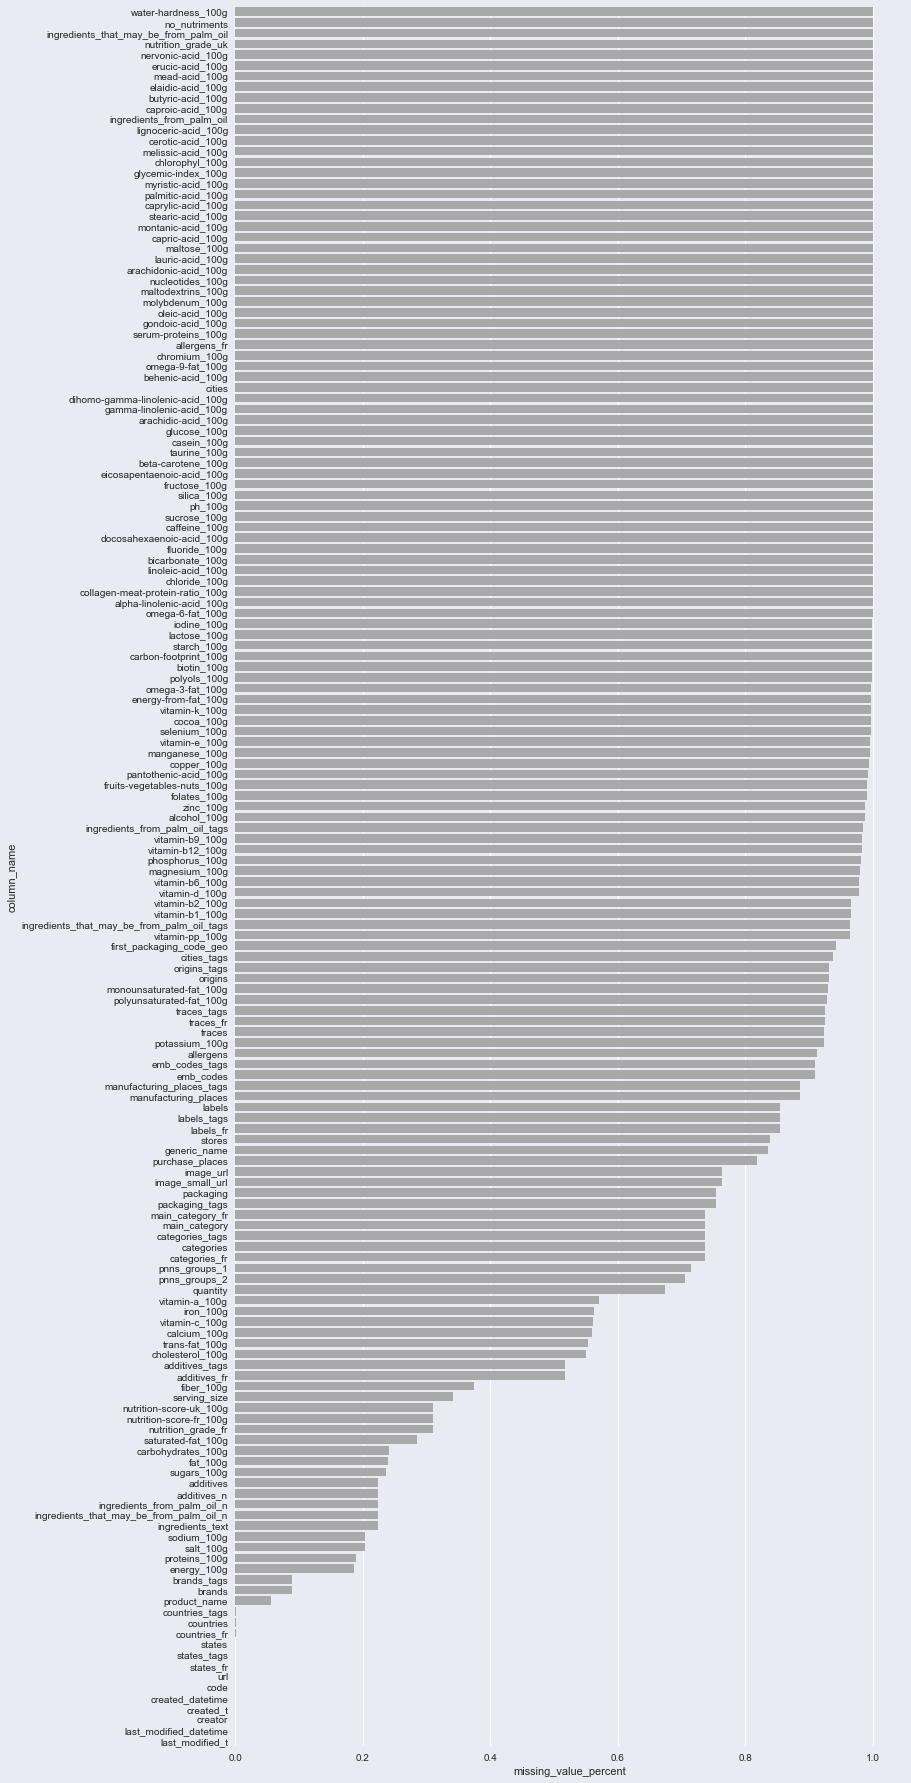

In [3]:
mean_na = pd.DataFrame(columns=['column_name', 'missing_value_percent'])

for col in df.columns:
    na_percent = df[col].isna().mean()
    row = {'column_name': col, 'missing_value_percent': na_percent}
    mean_na.loc[len(mean_na)] = row
    
mean_na.sort_values(by='missing_value_percent', ascending=False, inplace=True)

plt.figure(figsize=(12,32), facecolor="#eaeaf2")
sns.barplot(data=mean_na, y='column_name', x='missing_value_percent', color='darkgrey');

In [5]:
mean_na.head()

,column_name,missing_value_percent
161,water-hardness_100g,1.0
41,no_nutriments,1.0
50,ingredients_that_may_be_from_palm_oil,1.0
52,nutrition_grade_uk,1.0
98,nervonic-acid_100g,1.0


In [6]:
for col in df.columns:
    na_percent = df[col].isna().mean()
    print(f"{col}: {round(na_percent, 3)}")
    if na_percent > 0.5:
        df.drop(col, axis=1, inplace=True)
        print(f'la colonne {col} a été supprimé')

code: 0.0
url: 0.0
creator: 0.0
created_t: 0.0
created_datetime: 0.0
last_modified_t: 0.0
last_modified_datetime: 0.0
product_name: 0.055
generic_name: 0.835
la colonne generic_name a été supprimé
quantity: 0.673
la colonne quantity a été supprimé
packaging: 0.754
la colonne packaging a été supprimé
packaging_tags: 0.754
la colonne packaging_tags a été supprimé
brands: 0.089
brands_tags: 0.089
categories: 0.737
la colonne categories a été supprimé
categories_tags: 0.737
la colonne categories_tags a été supprimé
categories_fr: 0.737
la colonne categories_fr a été supprimé
origins: 0.931
la colonne origins a été supprimé
origins_tags: 0.931
la colonne origins_tags a été supprimé
manufacturing_places: 0.886
la colonne manufacturing_places a été supprimé
manufacturing_places_tags: 0.886
la colonne manufacturing_places_tags a été supprimé
labels: 0.855
la colonne labels a été supprimé
labels_tags: 0.855
la colonne labels_tags a été supprimé
labels_fr: 0.855
la colonne labels_fr a été suppri

molybdenum_100g: 1.0
la colonne molybdenum_100g a été supprimé
iodine_100g: 0.999
la colonne iodine_100g a été supprimé
caffeine_100g: 1.0
la colonne caffeine_100g a été supprimé
taurine_100g: 1.0
la colonne taurine_100g a été supprimé
ph_100g: 1.0
la colonne ph_100g a été supprimé
fruits-vegetables-nuts_100g: 0.991
la colonne fruits-vegetables-nuts_100g a été supprimé
collagen-meat-protein-ratio_100g: 0.999
la colonne collagen-meat-protein-ratio_100g a été supprimé
cocoa_100g: 0.997
la colonne cocoa_100g a été supprimé
chlorophyl_100g: 1.0
la colonne chlorophyl_100g a été supprimé
carbon-footprint_100g: 0.999
la colonne carbon-footprint_100g a été supprimé
nutrition-score-fr_100g: 0.31
nutrition-score-uk_100g: 0.31
glycemic-index_100g: 1.0
la colonne glycemic-index_100g a été supprimé
water-hardness_100g: 1.0
la colonne water-hardness_100g a été supprimé


In [7]:
df.shape

(320772, 34)

il n'y a que 34 colonnes avec moins de 50% de valeurs manquantes. Regardons quelles sont celles que nous devons garder pour notre application

In [8]:
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

<h1>1.4 Différence entre les nutritions scores and grades</h1><a class="anchor" id="14"></a>

In [9]:
df.nutrition_grade_fr.unique()

array([nan, 'd', 'b', 'c', 'a', 'e'], dtype=object)

la colonne nutrition grade semble être ce que nous connaissons sous l'appelation nutri-score

In [10]:
df['nutrition-score-fr_100g'].unique()

array([ nan,  14.,   0.,  12.,   7.,  -6.,  15.,  11.,   9.,  16.,  19.,
        -1.,   6.,  26.,  13.,  10.,  17.,  22.,  23.,  30.,   8.,  25.,
        -2.,   1.,   2.,  18.,  21.,  20.,   3.,   4.,  24.,  27.,  28.,
        -3.,  -4.,  -7.,  -5.,   5.,  29.,  31.,  -8.,  -9.,  35.,  33.,
        32.,  34., -10.,  40.,  37.,  38., -11.,  36., -13., -12., -14.,
       -15.])

In [11]:
df['nutrition-score-uk_100g'].unique()

array([ nan,  14.,   0.,  12.,   7.,  -6.,  15.,  11.,   9.,  16.,  19.,
        -1.,   6.,  26.,  13.,  10.,  17.,  22.,  23.,  30.,   8.,  25.,
        -2.,   1.,   2.,  18.,  21.,  20.,   3.,   4.,  24.,  27.,  28.,
        -3.,  -4.,  -7.,  -5.,   5.,  29.,  31.,  -8.,  -9.,  35.,  33.,
        32.,  34., -10.,  40.,  37.,  38., -11.,  36., -13., -12., -14.,
       -15.])

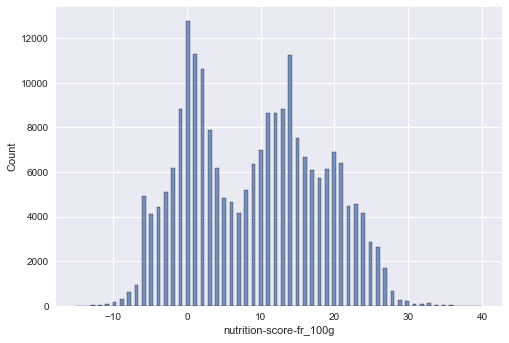

In [12]:
sns.histplot(data=df, x='nutrition-score-fr_100g');

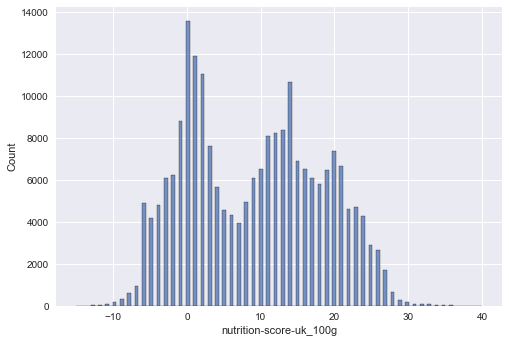

In [13]:
sns.histplot(data=df, x='nutrition-score-uk_100g');

La distribution des valeurs est la même pour les nutritions scores, nous n'avons donc pas besoin des deux

In [14]:
df.drop('nutrition-score-uk_100g', axis=1, inplace=True)

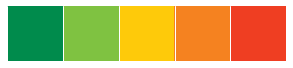

In [15]:
palette_nutriscore = ["#008b4c", "#7fc241", "#feca0a", "#f58220", "#ef3e22"]
sns.palplot(palette_nutriscore)

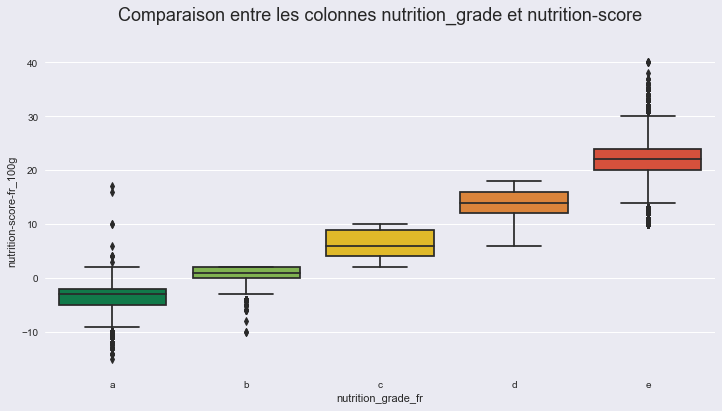

In [16]:
plt.figure(figsize=(12,6), facecolor="#eaeaf2")
sns.boxplot(data=df, x='nutrition_grade_fr', y='nutrition-score-fr_100g', order=['a', 'b', 'c', 'd', 'e'],
            palette=palette_nutriscore)
plt.title('Comparaison entre les colonnes nutrition_grade et nutrition-score\n',
         {'size': 18, 'weight': 'normal'});

Nous pouvons voir une forte correlation entre la colonne nutrition score et la colonne nutrition grade.

Nous allons pour le moment la garder car elle permet d'avoir une version numerique et une version categorique du nutriscore.

<h1>1.5 Timestamps</h1><a class="anchor" id="15"></a>

In [17]:
df.drop(['created_t', 'last_modified_t'], axis=1, inplace=True)

In [18]:
df.columns

Index(['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'brands', 'brands_tags', 'countries', 'countries_tags',
       'countries_fr', 'ingredients_text', 'serving_size', 'additives_n',
       'additives', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

Passage de la colonne au format datetime (mois et annee)

In [19]:
df['created_datetime'] = df['created_datetime'].str[:7]

In [20]:
df['last_modified_datetime'] = df['last_modified_datetime'].str[:7]

In [21]:
df[df['last_modified_datetime'].str[:2] != '20']

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
189068,NaN,NaN,villecomtal-sur-arros-gers-france,NaN,en:belg,"Belgique,France",NaN,NaN,"en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189103,NaN,NaN,"villecomtal-sur-arros-gers-france,saint-just-c...","Dia,Sog",en:fran,France,NaN,NaN,"en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",...,NaN,NaN,NaN,NaN,NaN,NaN,0.137,NaN,NaN,NaN
189109,NaN,NaN,villecomtal-sur-arros-gers-france,NaN,en:belg,"Belgique,France,Suisse",NaN,NaN,"en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189119,NaN,NaN,villecomtal-sur-arros-gers-france,SuperU,en:fran,France,NaN,NaN,"en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",...,NaN,NaN,NaN,NaN,NaN,NaN,0.122,NaN,NaN,NaN
189152,NaN,NaN,villecomtal-sur-arros-gers-france,Carrefo,en:fran,France,NaN,NaN,"en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",...,NaN,NaN,NaN,NaN,NaN,NaN,0.158,NaN,NaN,NaN
189160,NaN,NaN,villecomtal-sur-arros-gers-france,NaN,en:fran,France,NaN,NaN,"en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",...,NaN,NaN,NaN,NaN,NaN,NaN,0.156,NaN,NaN,NaN
189162,NaN,NaN,villecomtal-sur-arros-gers-france,Auchan,en:fran,France,NaN,NaN,"en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",...,NaN,NaN,NaN,NaN,NaN,NaN,0.158,NaN,NaN,NaN
189168,NaN,NaN,villecomtal-sur-arros-gers-france,NaN,en:fran,France,NaN,NaN,"en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",...,NaN,NaN,NaN,NaN,NaN,NaN,0.120,NaN,NaN,NaN
189242,NaN,NaN,villecomtal-sur-arros-gers-france,Carrefo,en:fran,France,NaN,NaN,"en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189244,NaN,NaN,villecomtal-sur-arros-gers-france,Carrefo,en:fran,France,NaN,NaN,"en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df = df[df['last_modified_datetime'].str[:2] == '20'].copy()

In [23]:
df['created_datetime'] = pd.to_datetime(df['created_datetime'])
df['last_modified_datetime'] = pd.to_datetime(df['last_modified_datetime'])

<h1>2. Filtrage des donnees et suppression des colonnes inutiles a l'application</h1><a class="anchor" id="20"></a>

In [24]:
df.drop(['code', 'creator'], axis=1, inplace=True)

<h1>2.1 Suppression des valeurs nutritives abberantes</h1><a class="anchor" id="21"></a>

Les valeurs nutritionnelles de nos aliments sont mesurées par 100 grammes, nous pouvons donc filter:
- les aliments avec des macros nutriments (protéines, glucides, matières grasses et sel) sont supérieurs à 100 grams
- les valeurs inférieur à 0
- les aliments avec plus de sucres que de glucides, et plus de graisses saturées que de matières grasses
- les aliments dont l'énergie diverge trop de la valeur calculée à partir des macro-nutriments

In [25]:
df['macro_100g'] = df['fat_100g'] + df['carbohydrates_100g'] + df['proteins_100g'] + df['salt_100g']
nutri_cols = ['macro_100g', 'fat_100g', 'carbohydrates_100g', 'proteins_100g', 'salt_100g', 'fiber_100g',
              'saturated-fat_100g', 'sugars_100g', 'sodium_100g']

for col in nutri_cols:
    df = df[(df[col] <= 100) & (df[col] >= 0)]
    
df['energy_low'] = df['fat_100g'] * 36 + df['carbohydrates_100g'] * 16 + df['proteins_100g'] * 16
df['energy_high'] = df['fat_100g'] * 38.5 + df['carbohydrates_100g'] * 17.5 + df['proteins_100g'] * 17.5

df = df[(df.energy_100g <= df.energy_high) & (df.energy_100g >= df.energy_low)]

df = df[df['carbohydrates_100g'] >= df['sugars_100g']]
df = df[df['saturated-fat_100g'] <= df['fat_100g']]

df.drop(['macro_100g', 'energy_low', 'energy_high'], axis=1, inplace=True)

In [26]:
df.shape

(108265, 29)

In [27]:
df.columns

Index(['url', 'created_datetime', 'last_modified_datetime', 'product_name',
       'brands', 'brands_tags', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

La quantité d'aliments issus de l'huile de palme ne nous interessent pas car il s'agit d'un problème écologique et non nutritif

In [28]:
df.drop(['ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n'], axis=1, inplace=True)

<h1>2.2 Nettoyage des colonnes restantes</h1><a class="anchor" id="22"></a>

In [29]:
df.brands_tags.unique()[:20]

array([nan, 'torn-glasser', 'daddy-s-muesli', 'sunridge', 'grizzlies',
       'golden-temple', 'napoleon', 'bob-s-red-mill', 'viva-la-salud',
       'northgate-market', 'pcc', 'northgate', 'not-a-branded-item',
       'torn-glasses', 'kirkland-signature', 'fresh-easy',
       'giant,fresh-easy', 'asda,asda-extra-special', 'pepsi', 'bijou'],
      dtype=object)

In [30]:
df.drop('brands_tags', axis=1, inplace=True)

In [31]:
df.countries.unique()[:20]

array(['US', 'France, US', 'Canada', 'United Kingdom', 'France',
       'United States', 'Germany', 'France,Royaume-Uni', 'UK,France',
       'France,Belgique,Pays-Bas,Royaume-Uni', 'France,United Kingdom',
       'États-Unis', 'Royaume-Uni,France', 'en:US',
       'France,Suisse,États-Unis,Canada', 'États-Unis, en:france, US',
       'Belgique,France,Pays-Bas,Royaume-Uni', 'Australie, US',
       'France, Suisse', 'en:FR, Suisse'], dtype=object)

In [32]:
df.countries_tags.unique()[:20]

array(['en:united-states', 'en:france,en:united-states', 'en:canada',
       'en:united-kingdom', 'en:france', 'en:germany',
       'en:france,en:united-kingdom',
       'en:belgium,en:france,en:netherlands,en:united-kingdom',
       'en:canada,en:france,en:switzerland,en:united-states',
       'en:france,en:united-states,en:etats-unis',
       'en:united-states,en:australie', 'en:france,en:switzerland',
       'en:australia,en:new-zealand,en:singapore,en:thailand,en:united-states',
       'en:united-states,en:pays-bas', 'en:mexico',
       'en:united-states,en:deutschland',
       'en:france,en:switzerland,en:united-states',
       'en:belgium,en:switzerland,en:united-states',
       'en:switzerland,en:united-states',
       'en:united-states,en:belgie,en:nederland'], dtype=object)

In [33]:
df.countries_fr.unique()[:20]

array(['États-Unis', 'France,États-Unis', 'Canada', 'Royaume-Uni',
       'France', 'Allemagne', 'France,Royaume-Uni',
       'Belgique,France,Pays-Bas,Royaume-Uni',
       'Canada,France,Suisse,États-Unis',
       'France,États-Unis,en:Etats-unis', 'États-Unis,en:Australie',
       'France,Suisse',
       'Australie,Nouvelle-Zélande,Singapour,Thaïlande,États-Unis',
       'États-Unis,en:Pays-bas', 'Mexique', 'États-Unis,en:Deutschland',
       'France,Suisse,États-Unis', 'Belgique,Suisse,États-Unis',
       'Suisse,États-Unis', 'États-Unis,en:Belgie,en:Nederland'],
      dtype=object)

In [34]:
df.states.unique()[:5]

array(['en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-uploaded',
       'en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-uploaded',
       'en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quanti

In [35]:
df.states_tags.unique()[:5]

array(['en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-uploaded',
       'en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-uploaded',
       'en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-n

In [36]:
df.drop(['states_tags', 'states', 'states_fr', 'countries_tags', 'countries'], axis=1, inplace=True)

In [37]:
df.shape

(108265, 21)

In [38]:
df['countries_fr'] = df['countries_fr'].str.replace('en:', '')

In [39]:
df.countries_fr.nunique()

313

La colonne countries_fr contient plus de valeurs qu'il y a de pays car il y a parfois plusieurs pays, ou des pays orthographié differemment. par exemple: Hong Kong qui apparait aussi comme 香港

- Tout d'abord, nous allons remplacer les listes de pays incluant la france, par la france, notre pays cible
- Ensuite, nous ne garderons que le premier pays des listes n'incluant pas la france

In [40]:
df.countries_fr.value_counts()[:30]

États-Unis                79464
France                    17704
Suisse                     5450
Espagne                     985
Royaume-Uni                 931
Allemagne                   879
France,Suisse               501
Belgique                    272
Belgique,France             180
Portugal                    176
France,Royaume-Uni          118
Italie                      114
Pays-Bas                     94
Canada                       92
Allemagne,Suisse             85
France,États-Unis            81
Australie                    60
France,Allemagne             56
France,Espagne               47
Belgique,France,Suisse       40
France,Guadeloupe            36
Autriche                     29
Serbie                       27
Roumanie                     26
Russie                       21
Irlande                      19
Mexique                      19
Nouvelle-Zélande             18
Brésil                       16
France,La Réunion            16
Name: countries_fr, dtype: int64

In [41]:
df['countries_fr'] = df['countries_fr'].str.replace('.*France.*', 'France', regex=True)

In [42]:
df.countries_fr.nunique()

175

In [43]:
df.countries_fr.value_counts()[:30]

États-Unis           79464
France               19055
Suisse                5450
Espagne                985
Royaume-Uni            931
Allemagne              879
Belgique               272
Portugal               176
Italie                 114
Pays-Bas                94
Canada                  92
Allemagne,Suisse        85
Australie               60
Autriche                29
Serbie                  27
Roumanie                26
Russie                  21
Mexique                 19
Irlande                 19
Nouvelle-Zélande        18
Brésil                  16
Luxembourg              15
Canada,États-Unis       13
Danemark                13
Thaïlande               13
Hongrie                 13
Suisse,États-Unis       13
Guadeloupe              12
Suède                   10
Guyane                   9
Name: countries_fr, dtype: int64

In [44]:
df['countries_fr'] = df['countries_fr'].str.split(',')
df['countries_fr'] = df['countries_fr'].str[0]

In [45]:
df.countries_fr.nunique()

87

In [46]:
df.columns

Index(['url', 'created_datetime', 'last_modified_datetime', 'product_name',
       'brands', 'countries_fr', 'ingredients_text', 'serving_size',
       'additives_n', 'additives', 'nutrition_grade_fr', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

In [47]:
df.drop('serving_size', axis=1, inplace=True)

In [48]:
df.additives.unique()[:20]

array([' [ bananas -> en:bananas  ]  [ vegetable-oil -> en:vegetable-oil  ]  [ oil -> en:oil  ]  [ coconut-oil -> en:coconut-oil  ]  [ oil -> en:oil  ]  [ corn-oil-and-or-palm-oil-sugar -> en:corn-oil-and-or-palm-oil-sugar  ]  [ oil-and-or-palm-oil-sugar -> en:oil-and-or-palm-oil-sugar  ]  [ and-or-palm-oil-sugar -> en:and-or-palm-oil-sugar  ]  [ or-palm-oil-sugar -> en:or-palm-oil-sugar  ]  [ palm-oil-sugar -> en:palm-oil-sugar  ]  [ oil-sugar -> en:oil-sugar  ]  [ sugar -> en:sugar  ]  [ natural-banana-flavor -> en:natural-banana-flavor  ]  [ banana-flavor -> en:banana-flavor  ]  [ flavor -> en:flavor  ] ',
       ' [ peanuts -> en:peanuts  ]  [ wheat-flour -> en:wheat-flour  ]  [ flour -> en:flour  ]  [ sugar -> en:sugar  ]  [ rice-flour -> en:rice-flour  ]  [ flour -> en:flour  ]  [ tapioca-starch -> en:tapioca-starch  ]  [ starch -> en:starch  ]  [ salt -> en:salt  ]  [ leavening -> en:leavening  ]  [ ammonium-bicarbonate -> en:ammonium-bicarbonate  ]  [ bicarbonate -> en:bicarbon

In [49]:
df.drop(['additives', 'additives_n'], axis=1, inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108265 entries, 1 to 320768
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   url                      108265 non-null  object        
 1   created_datetime         108264 non-null  datetime64[ns]
 2   last_modified_datetime   108265 non-null  datetime64[ns]
 3   product_name             106777 non-null  object        
 4   brands                   105682 non-null  object        
 5   countries_fr             108248 non-null  object        
 6   ingredients_text         104211 non-null  object        
 7   nutrition_grade_fr       108061 non-null  object        
 8   energy_100g              108265 non-null  float64       
 9   fat_100g                 108265 non-null  float64       
 10  saturated-fat_100g       108265 non-null  float64       
 11  carbohydrates_100g       108265 non-null  float64       
 12  sugars_100g     

<h1>3. Valeurs Manquantes et donnees dupliquées</h1><a class="anchor" id="30"></a>

- Pour les colonnes product_name et brands, nous allons supprimer les rangs avec des valeurs manquantes.
- Les pays et ingredients manquants seront remplaces par "inconnu(s)"
- la valeur de created_datetime sera remplacé par celle de last_modified_datetime
- enfin le nutrition score sera calculé avec un modèle de régression linéaire et le nutrition grade à partir du score

<h1>3.1 Produits dupliqués</h1><a class="anchor" id="31"></a>
Pour filter les produits dupliqués, nous devons faire aussi vérifier qu'ils sont de la même marque. Certains produits peuvent avoir le même nom, mais être de qualités différentes. L'un des exemples commun sont les lardons et les jambons, étant plus gras dans les marques premiers prix.

In [51]:
copy = df.copy()

In [52]:
copy = copy[copy.product_name.notna() & copy.brands.notna()].copy()

In [53]:
copy.shape

(105462, 18)

<h1>3.2 Valeurs Manquantes</h1><a class="anchor" id="32"></a>

In [54]:
copy['countries_fr'].fillna(value='Inconnu(s)', inplace=True)
copy['ingredients_text'].fillna(value='Inconnu(s)', inplace=True)

In [55]:
copy['created_datetime'].fillna(value=df['last_modified_datetime'], inplace=True)

In [56]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105462 entries, 2 to 320768
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   url                      105462 non-null  object        
 1   created_datetime         105462 non-null  datetime64[ns]
 2   last_modified_datetime   105462 non-null  datetime64[ns]
 3   product_name             105462 non-null  object        
 4   brands                   105462 non-null  object        
 5   countries_fr             105462 non-null  object        
 6   ingredients_text         105462 non-null  object        
 7   nutrition_grade_fr       105259 non-null  object        
 8   energy_100g              105462 non-null  float64       
 9   fat_100g                 105462 non-null  float64       
 10  saturated-fat_100g       105462 non-null  float64       
 11  carbohydrates_100g       105462 non-null  float64       
 12  sugars_100g     

<h1>3.3 Nutriscore</h1><a class="anchor" id="33"></a>

<h1>3.3.1 Calcul du nutriscore</h1><a class="anchor" id="331"></a>

In [57]:
corr = df.corr()
corr['nutrition-score-fr_100g']

energy_100g                0.621217
fat_100g                   0.590484
saturated-fat_100g         0.662991
carbohydrates_100g         0.224434
sugars_100g                0.487890
fiber_100g                -0.129037
proteins_100g              0.066394
salt_100g                  0.097997
sodium_100g                0.097998
nutrition-score-fr_100g    1.000000
Name: nutrition-score-fr_100g, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae

train = copy[copy['nutrition-score-fr_100g'].notna()].copy()
test = copy[copy['nutrition-score-fr_100g'].isna()].copy()

train, val = train_test_split(train, test_size=0.2, random_state=42)

X_col = ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g', 'fiber_100g', 'salt_100g']

X_train = train[X_col].copy()
X_test = test[X_col].copy()
X_val = val[X_col].copy()

y_train = train['nutrition-score-fr_100g']
y_val = val['nutrition-score-fr_100g']
y_test = test['nutrition-score-fr_100g']

In [69]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_val)

mae_score = mae(y_val, y_pred)
mae_score = round(mae_score, 3)

print(f'The mean absolute error on the validation split is: {mae_score}')

The mean absolute error on the validation split is: 3.604


In [70]:
print(df['nutrition-score-fr_100g'].max())
print(df['nutrition-score-fr_100g'].min())

35.0
-14.0


Les valeurs du nutriscore sont comprises entre -14 et 35. Nous allons utiliser ces limites pour comme valeurs limites de nos predictions

In [71]:
y_pred_lim = [-14.0 if y < -14 else y for y in y_pred ]
y_pred_lim = [35.0 if y > 35 else y for y in y_pred_lim]

21052
21052


In [72]:
new_mae = mae(y_val, y_pred_lim)
new_mae = round(new_mae, 3)

print(f'the mean absolute error after data correction is: {new_mae}')

the mean absolute error after data correction is: 3.58


<h1>3.3.2 Visualization des resultat de notre modele</h1><a class="anchor" id="332"></a>

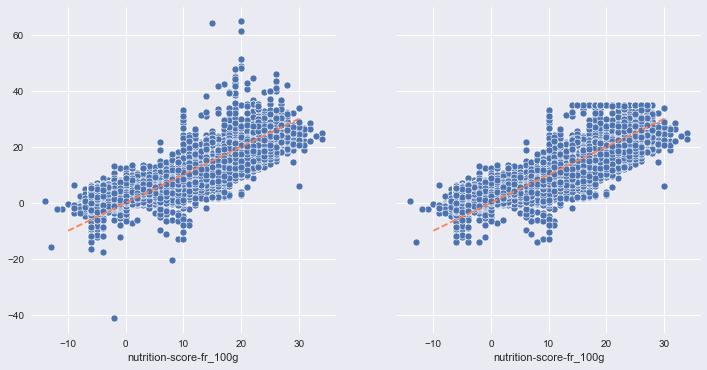

In [75]:
fig, ax = plt.subplots(1,2,figsize=(12,6), facecolor="#eaeaf2", sharex=True, sharey=True)

sns.scatterplot(ax=ax[0], x=y_val, y=y_pred)
sns.lineplot(ax=ax[0], x=[-10,30], y=[-10,30], color='coral', linestyle='--')

sns.scatterplot(ax=ax[1], x=y_val, y=y_pred_lim)
sns.lineplot(ax=ax[1], x=[-10,30], y=[-10,30], color='coral', linestyle='--');

In [76]:
preds = model.predict(X_test)

In [78]:
preds = [-14.0 if y < -14 else 0 for y in preds]
preds = [35 if y > 35 else 0 for y in preds]

In [79]:
test['nutrition-score-fr_100g'] = preds
test['nutrition-score-fr_100g'] = round(test['nutrition-score-fr_100g'], 0)

In [80]:
final = pd.concat([train, val, test], axis=0)

In [81]:
final.shape

(105462, 18)

In [82]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105462 entries, 14735 to 320529
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   url                      105462 non-null  object        
 1   created_datetime         105462 non-null  datetime64[ns]
 2   last_modified_datetime   105462 non-null  datetime64[ns]
 3   product_name             105462 non-null  object        
 4   brands                   105462 non-null  object        
 5   countries_fr             105462 non-null  object        
 6   ingredients_text         105462 non-null  object        
 7   nutrition_grade_fr       105259 non-null  object        
 8   energy_100g              105462 non-null  float64       
 9   fat_100g                 105462 non-null  float64       
 10  saturated-fat_100g       105462 non-null  float64       
 11  carbohydrates_100g       105462 non-null  float64       
 12  sugars_100g 

In [83]:
nutriscore_notna = final[final['nutrition_grade_fr'].notna()].copy()
nutriscore_isna = final[final['nutrition_grade_fr'].isna()].copy()

In [84]:
nutriscore_isna.head()

,url,created_datetime,last_modified_datetime,product_name,brands,countries_fr,ingredients_text,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
71910,http://world-fr.openfoodfacts.org/produit/0070...,2015-09-01,2017-03-01,Cup Noodles Chicken Flavor,"Nissin, Nissin Foods(Usa) Co. Inc.",États-Unis,"INGREDIENTS: ENRICHED FLOUR (_WHEAT_ FLOUR, NI...",NaN,1830.0,17.2,7.81,62.50,3.12,3.12,10.90,5.680,2.230000,0.0
137507,http://world-fr.openfoodfacts.org/produit/0735...,2017-02-01,2017-04-01,Instant Noodles Soup - Vegetable Flavor,Tradition,France,"Farine de _blé_ enrichie (farine de _blé_, mon...",NaN,1866.0,20.0,9.23,55.38,3.08,3.10,9.23,4.318,1.700000,0.0
175928,http://world-fr.openfoodfacts.org/produit/2000...,2015-10-01,2015-10-01,Bouillon cube légumes sans sel,"Jardin Bio',Léa Nature",France,"Beurre de karité, légumes 20 % (tomates, céler...",NaN,2151.0,31.1,14.40,49.00,21.00,5.80,6.60,0.300,0.118110,0.0
184592,http://world-fr.openfoodfacts.org/produit/2601...,2014-06-01,2015-10-01,Purée de Pommes de Terre en Flocons,Albona,France,Inconnu(s),NaN,1430.0,0.5,0.40,76.00,0.90,6.50,7.50,0.127,0.050000,0.0
187167,http://world-fr.openfoodfacts.org/produit/3011...,2014-04-01,2017-01-01,Chorba marocaine au mouton (halal),"Knorr,Unilever",France,"légumes : 34% (haricot brun, tomate, oignon, c...",NaN,142.0,0.5,0.20,5.50,1.40,0.60,1.60,0.750,0.295276,0.0


<h1>3.3.3 Calcul des resultats du nutrigrade</h1><a class="anchor" id="333"></a>

In [85]:
for i, row in nutriscore_isna.iterrows():
    if row['nutrition-score-fr_100g'] < 0:
        nutriscore_isna['nutrition_grade_fr'].loc[i] = 'a'
    elif row['nutrition-score-fr_100g'] >= 0 and row['nutrition-score-fr_100g'] < 4:
        nutriscore_isna['nutrition_grade_fr'].loc[i] = 'b'
    elif row['nutrition-score-fr_100g'] >= 4 and row['nutrition-score-fr_100g'] < 10:
        nutriscore_isna['nutrition_grade_fr'].loc[i] = 'c'
    elif row['nutrition-score-fr_100g'] >= 10 and row['nutrition-score-fr_100g'] < 16:
        nutriscore_isna['nutrition_grade_fr'].loc[i] = 'd'
    else:
        nutriscore_isna['nutrition_grade_fr'].loc[i] = 'e'

C:\Users\petit\AppData\Local\Temp\ipykernel_22852\1662681086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nutriscore_isna['nutrition_grade_fr'].loc[i] = 'b'


In [86]:
nutriscore_isna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 71910 to 320529
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   url                      203 non-null    object        
 1   created_datetime         203 non-null    datetime64[ns]
 2   last_modified_datetime   203 non-null    datetime64[ns]
 3   product_name             203 non-null    object        
 4   brands                   203 non-null    object        
 5   countries_fr             203 non-null    object        
 6   ingredients_text         203 non-null    object        
 7   nutrition_grade_fr       203 non-null    object        
 8   energy_100g              203 non-null    float64       
 9   fat_100g                 203 non-null    float64       
 10  saturated-fat_100g       203 non-null    float64       
 11  carbohydrates_100g       203 non-null    float64       
 12  sugars_100g              203 

In [87]:
final = pd.concat([nutriscore_notna, nutriscore_isna], axis=0)

In [88]:
final.shape

(105462, 18)

In [89]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105462 entries, 14735 to 320529
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   url                      105462 non-null  object        
 1   created_datetime         105462 non-null  datetime64[ns]
 2   last_modified_datetime   105462 non-null  datetime64[ns]
 3   product_name             105462 non-null  object        
 4   brands                   105462 non-null  object        
 5   countries_fr             105462 non-null  object        
 6   ingredients_text         105462 non-null  object        
 7   nutrition_grade_fr       105462 non-null  object        
 8   energy_100g              105462 non-null  float64       
 9   fat_100g                 105462 non-null  float64       
 10  saturated-fat_100g       105462 non-null  float64       
 11  carbohydrates_100g       105462 non-null  float64       
 12  sugars_100g 

In [90]:
final[final.duplicated(subset=['product_name', 'brands'])]

,url,created_datetime,last_modified_datetime,product_name,brands,countries_fr,ingredients_text,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
29055,http://world-fr.openfoodfacts.org/produit/0033...,2017-03-01,2017-03-01,Whole Grain Bread,Natural Ovens Bakery,États-Unis,"Whole wheat flour, water, wheat gluten, rolled...",a,1046.0,5.56,0.00,41.67,2.78,8.3,11.11,0.74168,0.292000,-4.0
117841,http://world-fr.openfoodfacts.org/produit/0609...,2017-03-01,2017-03-01,Pears,Nutty & Fruity,États-Unis,Pears.,c,1046.0,0.00,0.00,62.50,27.50,20.0,2.50,0.00000,0.000000,3.0
5262,http://world-fr.openfoodfacts.org/produit/0011...,2017-03-01,2017-03-01,Cut Sweet Potatoes In Light Syrup,Roundy's,États-Unis,"Sweet potatoes, water, corn syrup, sugar.",c,368.0,0.00,0.00,21.25,11.88,0.6,0.00,0.03048,0.012000,3.0
48412,http://world-fr.openfoodfacts.org/produit/0041...,2017-03-01,2017-03-01,Premium Ice Cream,Weis,États-Unis,"Nonfat milk, cream, sugar, peanut butter sauce...",d,1151.0,17.39,7.25,26.09,21.74,1.4,5.80,0.42418,0.167000,14.0
128016,http://world-fr.openfoodfacts.org/produit/0702...,2017-03-01,2017-03-01,"Hacienda, Authentic Yellow Corn Tortillas",Hacienda Mexican Foods,États-Unis,"Stone ground corn, water, contains less than 2...",a,920.0,3.00,0.00,44.00,0.00,4.0,4.00,0.05080,0.020000,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28312,http://world-fr.openfoodfacts.org/produit/0032...,2017-03-01,2017-03-01,Pocket Pita Breads,"Whole Foods Market, Mjay's Specialty Baked Fo...",États-Unis,"Enriched flour, [corn starch, niacin, (b-compl...",b,1046.0,0.00,0.00,53.57,3.57,0.0,10.71,1.04394,0.411000,2.0
23470,http://world-fr.openfoodfacts.org/produit/0027...,2017-03-01,2017-03-01,Apple Crisp,Lyman Orchards,États-Unis,"Filling: apples, sugar, modified corn starch, ...",c,828.0,4.96,1.65,37.19,26.45,2.5,1.65,0.21082,0.083000,4.0
23162,http://world-fr.openfoodfacts.org/produit/0027...,2017-03-01,2017-03-01,Flour Tortillas,Verole,États-Unis,"Enriched bleached flour, water, vegetable shor...",b,1021.0,2.11,0.70,46.48,0.00,7.0,8.45,1.61290,0.635000,0.0
200367,http://world-fr.openfoodfacts.org/produit/3222...,2013-10-01,2015-10-01,Purée nature,Casino,France,"Pommes de terre 99 %, émulsifiant : mono- et d...",b,1487.0,0.60,0.40,76.00,0.80,4.6,8.00,0.15240,0.060000,0.0


In [91]:
final.drop_duplicates(subset=['product_name', 'brands'], inplace=True)

In [92]:
final.shape

(98973, 18)

<h1>4. Sauvegarde des données nettoyées</h1><a class="anchor" id="40"></a>

In [93]:
final.to_csv('food_cleaned.csv',index=False)